# CM50270 Reinforcement Learning
## Graded Assessment 2: Racetrack

In this assignment, you will implement and compare the performance of three reinforcement learning algorithms: On-Policy First-Visit Monte-Carlo Control, Sarsa, and Q-Learning.

**Total number of marks:** 40 marks.

**What to submit:** Your completed Jupyter notebook (.ipynb file) which should include **all** of your source code. Please **do not change the file name or compress/zip your submission**. Please do not include any identifying information on the files you submit. This coursework will be marked **anonymously**.

**Where to submit:** CM50270 Moodle Page.

You are required to **work individually**. You are welcome to discuss ideas with others but you must design your own implementation and **write your own code**.

**Do not plagiarise**. Plagiarism is a serious academic offence. For details on what plagiarism is and how to avoid it, please visit the following webpage: http://www.bath.ac.uk/library/help/infoguides/plagiarism.html

If you are asked to use specific variable names, data-types, function signatures and notebook cells, please **ensure that you follow these instructions**. Not doing so will cause the our marking software to reject your work, and will assign you a score of zero for that question. Please **do not duplicate or delete existing cells**: if you need additional cells, please insert new ones. **If our marking software rejects your work because you have not followed our instructions, you may not get any credit for your work**.

Please **do not use any non-standard, third-party libraries** apart from numpy and matplotlib. In this assignment, you should also use the `racetrack_env.py` file, which we have provided for you. **If we are unable to run your code because you have used unsupported external libraries, you may not get any credit for your work.**

Please remember to **save your work regularly**.

Please be sure to **restart the kernel and run your code from start-to-finish** (Kernel → Restart & Run All) before submitting your notebook. Otherwise, you may not be aware that you are using variables in memory that you have deleted.

Your total runtime must be less than **10 minutes** on the University's lab computers, and **written answer length limits** must be adhered to. Otherwise, you may not get credit for your work.

## The Racetrack Environment
We have implemented a custom environment called "Racetrack" for you to use during this piece of coursework. It is inspired by the environment described in the course textbook (Reinforcement Learning, Sutton & Barto, 2018, Exercise 5.12), but is not exactly the same.

### Environment Description
Consider driving a race car around a turn on a racetrack. In order to complete the race as quickly as possible, you would want to drive as fast as you can but, to avoid running off the track, you must slow down while turning.

In our simplified racetrack environment, the agent is at one of a discrete set of grid positions. The agent also has a discrete speed in two directions, $x$ and $y$. So the state is represented as follows:
$$(\text{position}_y, \text{position}_x, \text{velocity}_y, \text{velocity}_x)$$

The agent collects a reward of -1 at each time step, an additional -10 for leaving the track (i.e., ending up on a black grid square in the figure below), and an additional +10 for reaching the finish line (any of the red grid squares). The agent starts each episode on a randomly selected grid-square on the starting line (green grid squares) with a speed of zero in both directions. At each time step, the agent can change its speed in both directions. Each speed can be changed by +1, -1 or 0, giving a total of nine actions. For example, the agent may increase its speed in the $x$ direction by -1 and its speed in the $y$ direction by +1. The agent's speed cannot be greater than +10 or less than -10 in either direction.

<img src="images/track_big.png" style="width: 600px;"/>


The agent's next state is determined by its current grid square, its current speed in two directions, and the changes it  makes to its speed in the two directions. This environment is stochastic. When the agent tries to change its speed, no change occurs (in either direction) with probability 0.2. In other words, 20% of the time, the agent's action is ignored and the car's speed remains the same in both directions.

If the agent leaves the track, it is returned to a random start grid-square and has its speed set to zero in both directions; the episode continues. An episode ends only when the agent transitions to a goal grid-square.



### Environment Implementation
We have implemented the above environment in the `racetrack_env.py` file, for you to use in this coursework. Please use this implementation instead of writing your own, and please do not modify the environment.

We provide a `RacetrackEnv` class for your agents to interact with. The class has the following methods:
- **`reset()`** - this method initialises the environment, chooses a random starting state, and returns it. This method should be called before the start of every episode.
- **`step(action)`** - this method takes an integer action (more on this later), and executes one time-step in the environment. It returns a tuple containing the next state, the reward collected, and whether the next state is a terminal state.
- **`render(sleep_time)`** - this method renders a matplotlib graph representing the environment. It takes an optional float parameter giving the number of seconds to display each time-step. This method is useful for testing and debugging, but should not be used during training since it is *very* slow. **Do not use this method in your final submission**.
- **`get_actions()`** - a simple method that returns the available actions in the current state. Always returns a list containing integers in the range [0-8] (more on this later).

In our code, states are represented as Python tuples - specifically a tuple of four integers. For example, if the agent is in a grid square with coordinates ($Y = 2$, $X = 3$), and is moving zero cells vertically and one cell horizontally per time-step, the state is represented as `(2, 3, 0, 1)`. Tuples of this kind will be returned by the `reset()` and `step(action)` methods. It is worth noting that tuples can be used to index certain Python data-structures, such as dictionaries.

There are nine actions available to the agent in each state, as described above. However, to simplify your code, we have represented each of the nine actions as an integer in the range [0-8]. The table below shows the index of each action, along with the corresponding changes it will cause to the agent's speed in each direction.

<img src="images/action_grid.png" style="width: 250px;"/>

For example, taking action 8 will increase the agent's speed in the $x$ direction, but decrease its speed in the $y$ direction.

### Racetrack Code Example
Below, we go through a quick example of using the `RaceTrackEnv` class.

First, we import the class, then create a `RaceTrackEnv` object called `env`. We then initialise the environment using the `reset()` method, and take a look at the initial state variable and the result of `plot()`.


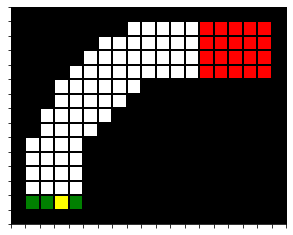

Initial State: (1, 3, 0, 0)


In [1]:
%matplotlib inline

# Set random seed to make example reproducable.
import numpy as np
import random
seed = 5
random.seed(seed)
np.random.seed(seed)

from racetrack_env import RacetrackEnv

# Instantiate environment object.
env = RacetrackEnv()

# Initialise/reset environment.
state = env.reset()
env.render()
print("Initial State: {}".format(state))

As you can see, `reset()` has returned a valid initial state as a four-tuple. The function `plot()` uses the same colour-scheme as described above, but also includes a yellow grid-square to indicate the current position of the agent.

Let's make the agent go upward by using `step(1)`, then inspect the result (recall that action `1` increments the agent's vertical speed while leaving the agent's horizontal speed unchanged).

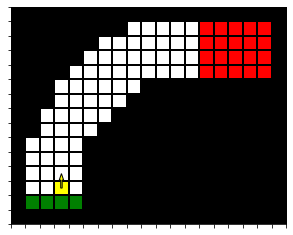

Next State: (2, 3, 1, 0), Reward: -1, Terminal: False


In [2]:
# Let us increase the agent's vertical speed (action 1).
next_state, reward, terminal = env.step(1)
env.render()
print("Next State: {}, Reward: {}, Terminal: {}".format(next_state, reward, terminal))

You can see that the agent has moved one square upwards, and now has a positive vertical speed (indicated by the yellow arrow). Let's set up a loop to see what happens if we take the action a few more times, causing it to repeatedly leave the track.

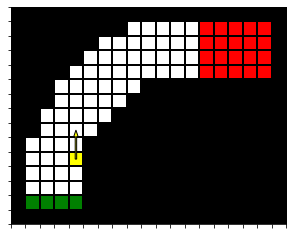

In [3]:
num_steps = 50
for t in range(num_steps) :
    next_state, reward, terminal = env.step(1)
    env.render()

## Exercise 1: On-Policy MC Control (6 Marks)

In this exercise, you will implement an agent which learns to reach a goal state in the racetrack task using On-Policy First-Visit MC Control, the pseudocode for which is reproduced below (Reinforcement Learning, Sutton & Barto, 2018, Section 5.4 p.101).

<img src="images/mc_control_algo.png" style="width: 650px;"/>

Please use the following parameter settings:
- Discount factor $\gamma = 0.9$.
- For your $\epsilon$-greedy policy, use exploratory action probability $\epsilon = 0.15$.
- Number of training episodes $= 150$.
- Number of agents averaged should be at **least** 20.

**If you use incorrect parameters, you may not get any credit for your work.**

Your implementation of a tabular **On-Policy First-Visit MC Control** agent should produce a list named `mc_rewards`. This list should contain one list for each agent that you train. Each sub-list should contain the undiscounted sum of rewards earned during each episode by the corresponding agent. <br />
For example, if you train $20$ agents, your `mc_rewards` list will contain $20$ sub-lists, each containing $150$ integers. This list will be used to plot an average learning curve, which will be used to mark your work.

In [4]:
# Please write your code for Exercise 1 in this cell or in as many cells as you want ABOVE this cell.
# You should implement your MC agent and plot your average learning curve here.
# Do NOT delete this cell.

epsilon =0.15
gamma = 0.9
num_agents = 20
num_episodes = 150
mc_rewards = np.zeros((num_agents, num_episodes))
Q = {}
returns = {}


def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.randint(9)
    else:
        action = np.random.choice(np.where(Q[state] == max(Q[state]))[0])
    return action

def mc_update(trajectory, Q, returns, a, e):
    G = 0
    first_visit_dict = {}  
    for t in range(len(trajectory)-1, -1, -1) :
        state_, action_, reward_ =  trajectory[t]
        G = (gamma * G) + reward_
        mc_rewards[a][e] += reward_
        
        if (state_, action_) not in first_visit_dict:
            first_visit_dict[(state_, action_)] = True
            
            if state_ not in returns :
                returns[state_] = {action: [] for action in env.get_actions()}
                
            returns[state_][action_].append(G)
            Q[state_][action_] = np.mean(returns[state_][action_])

for a in range(num_agents):
    Q = {}
    returns = {}
    print("Training agent: " , a + 1)
    for e in range(num_episodes):
        trajectory = []
        cur_state = env.reset()
        if cur_state not in Q:
            Q[cur_state] = np.zeros(9)
            
        terminal = False
        
        while not terminal:
            cur_action = choose_action(cur_state)
            new_state, reward, terminal = env.step(cur_action)
            
            if new_state not in Q:
                Q[new_state] = np.zeros(9)
            
            trajectory.append([cur_state, cur_action, reward])
            cur_state = new_state
        
        mc_update(trajectory, Q, returns, a, e)

 
                        

Training agent:  1
Training agent:  2
Training agent:  3
Training agent:  4
Training agent:  5
Training agent:  6
Training agent:  7
Training agent:  8
Training agent:  9
Training agent:  10
Training agent:  11
Training agent:  12
Training agent:  13
Training agent:  14
Training agent:  15
Training agent:  16
Training agent:  17
Training agent:  18
Training agent:  19
Training agent:  20


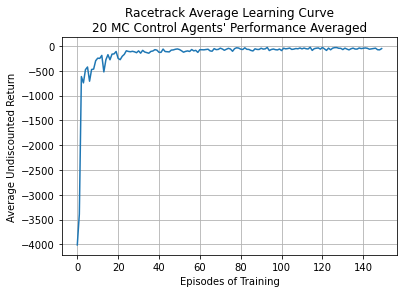

In [5]:
from racetrack_env import plot_results
from racetrack_env import simple_issue_checking

# Checking MC Control Results for Obvious Issues.
simple_issue_checking(mc_rewards)

# Plotting MC Control Learning Curve.
%matplotlib inline
plot_results(mc_rewards = mc_rewards)

## Exercise 2: Sarsa (3 Marks)

In this exercise, you will implement an agent which learns to reach a goal state in the racetrack task using the Sarsa algorithm, the pseudocode for which is reproduced below (Reinforcement Learning, Sutton & Barto, 2018, Section 6.4 p.129).

<img src="images/sarsa_algo.png" style="width: 650px;"/>

Please use the following parameter settings:
- Step size parameter $\alpha = 0.2$.
- Discount factor $\gamma = 0.9$.
- For your $\epsilon$-greedy policy, use exploratory action probability $\epsilon = 0.15$.
- Number of training episodes $= 150$.
- Number of agents averaged should be at **least** 20.

**If you use incorrect parameters, you may not get any credit for your work.**

Your implementation of a tabular **Sarsa** agent should produce a list named `sarsa_rewards`. This list should contain one list for each agent that you train. Each sub-list should contain the undiscounted sum of rewards earned during each episode by the corresponding agent. <br />
For example, if you train $20$ agents, your `sarsa_rewards` list will contain $20$ sub-lists, each containing $150$ integers. This list will be used to plot an average learning curve, which will be used to mark your work.

In [6]:
# Please write your code for Exercise 2 in this cell or in as many cells as you want ABOVE this cell.
# You should implement your sarsa agent and plot your average learning curve here.
# Do NOT delete this cell.
alpha = 0.2
gamma = 0.9
epsilon = 0.15
num_episodes = 150
num_agents = 20
max_steps = 200
sarsa_rewards = np.zeros((num_agents, num_episodes))

def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.randint(9)
    else:
        action = np.random.choice(np.where(q_values[state] == max(q_values[state]))[0])
    return action
    
for a in range(num_agents):
    q_values= {}
    print("Training agent: " , a + 1)
    for e in range(num_episodes):
        
        cur_state = env.reset()
        
        if cur_state not in q_values:
                q_values[cur_state] = np.zeros(9)
                
                
        cur_action = choose_action(cur_state)
        terminal = False
        while not terminal:
            
            new_state, reward, terminal = env.step(cur_action)
            sarsa_rewards[a][e] += reward
            
            if new_state not in q_values:
                q_values[new_state] = np.zeros(9)
            
            new_action = choose_action(new_state)

            #Learning the Q-value
            oldQ =  q_values[cur_state][cur_action]
            newQ =  q_values[new_state][new_action]
            
            q_values[cur_state][cur_action] += alpha * (reward + (gamma * newQ ) - oldQ )

            cur_state = new_state
            cur_action = new_action
            #Updating the respective vaLues
# YOUR CODE HERE

Training agent:  1
Training agent:  2
Training agent:  3
Training agent:  4
Training agent:  5
Training agent:  6
Training agent:  7
Training agent:  8
Training agent:  9
Training agent:  10
Training agent:  11
Training agent:  12
Training agent:  13
Training agent:  14
Training agent:  15
Training agent:  16
Training agent:  17
Training agent:  18
Training agent:  19
Training agent:  20


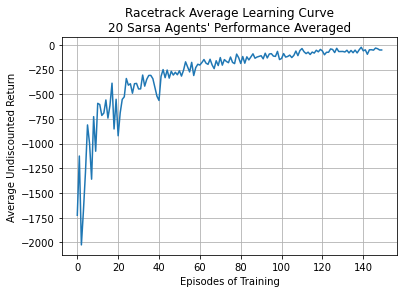

In [7]:
from racetrack_env import plot_results
from racetrack_env import simple_issue_checking

# Checking Sarsa Results for Obvious Issues.
simple_issue_checking(sarsa_rewards)

# Plotting Sarsa Learning Curve.
%matplotlib inline
plot_results(sarsa_rewards = sarsa_rewards)

## Exercise 3: Q-Learning (3 Marks)

In this exercise, you will implement an agent which learns to reach a goal state in the racetrack task using the Q-Learning algorithm, the pseudocode for which is reproduced below (Reinforcement Learning, Sutton & Barto, 2018, Section 6.5 p.131).

<img src="images/q_learning_algo.png" style="width: 650px;"/>

Please use the following parameter settings:
- Step size parameter $\alpha = 0.2$.
- Discount factor $\gamma = 0.9$.
- For your $\epsilon$-greedy policy, use exploratory action probability $\epsilon = 0.15$.
- Number of training episodes $= 150$.
- Number of agents averaged should be at **least** 20.

**If you use incorrect parameters, you may not get any credit for your work.**

Your implementation of a tabular **Q-Learning** agent should produce a list named `q_learning_rewards`. This list should contain one list for each agent that you train. Each sub-list should contain the undiscounted sum of rewards earned during each episode by the corresponding agent. <br />
For example, if you train $20$ agents, your `q_learning_rewards` list will contain $20$ sub-lists, each containing $150$ integers. This list will be used to plot an average learning curve, which will be used to mark your work.

Hint: Your Q-Learning implementation is likely to be similar to your Sarsa implementation. Think hard about where these two algorithms differ.

In [8]:
# Please write your code for Exercise 3 in this cell or in as many cells as you want ABOVE this cell.
# You should implement your q-learning agent agent and plot your average learning curve here.
# Do NOT delete this cell.
alpha = 0.2
gamma = 0.9
epsilon = 0.15
num_episodes = 150
num_agents = 20
max_step = 200
q_learning_rewards = np.zeros((num_agents, num_episodes))

def choose_action(state, q_values):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.randint(9)
    else:
        action = np.random.choice(np.where(q_values[state] == max(q_values[state]))[0])
    return action

for a in range(num_agents):
    
    q_values = {}
    print("Training agent: " , a+1)
    
    for e in range(num_episodes):
        
        cur_state = env.reset()
        
        if cur_state not in q_values:
            q_values[cur_state] = np.zeros(9)
        
        terminal = False
        while not terminal:
            
            
            action = choose_action(cur_state, q_values)
            
            new_state, reward, terminal = env.step(action)
            q_learning_rewards[a][e] += reward
            
            if new_state not in q_values:
                q_values[new_state] = np.zeros(9)

            oldQ = q_values[cur_state][action] 
            q_values[cur_state][action] = oldQ + alpha * (reward + gamma * max(q_values[new_state]) - oldQ)

            cur_state = new_state

            #Updating the respective vaLues
# YOUR CODE HERE

Training agent:  1
Training agent:  2
Training agent:  3
Training agent:  4
Training agent:  5
Training agent:  6
Training agent:  7
Training agent:  8
Training agent:  9
Training agent:  10
Training agent:  11
Training agent:  12
Training agent:  13
Training agent:  14
Training agent:  15
Training agent:  16
Training agent:  17
Training agent:  18
Training agent:  19
Training agent:  20


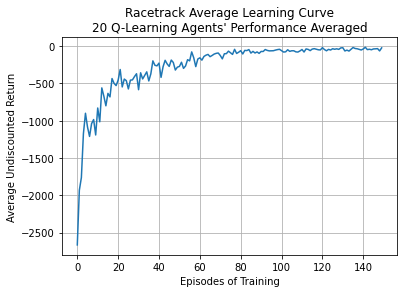

In [9]:
from racetrack_env import plot_results
from racetrack_env import simple_issue_checking

# Checking Q-Learning Results for Obvious Issues.
simple_issue_checking(q_learning_rewards)

# Plotting Q-Learning Learning Curve.
%matplotlib inline
plot_results(q_learning_rewards = q_learning_rewards)

## Exercise 4: Comparison & Discussion (10 Marks)

Below, we have used your results to plot your three previous learning curves on the same set of axes. <br />
A cropped version of this learning curve has also been plotted, to make it easier to compare the performance of your agents towards the end of training.

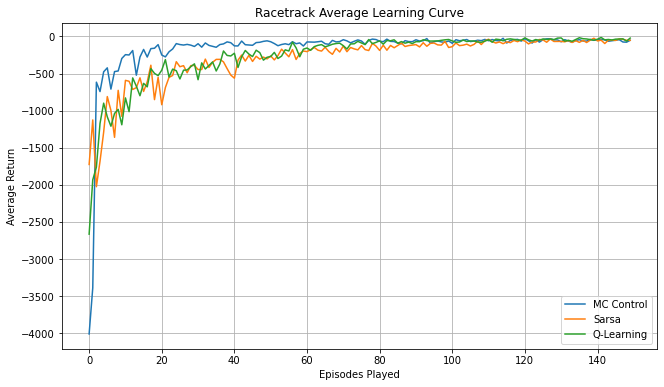

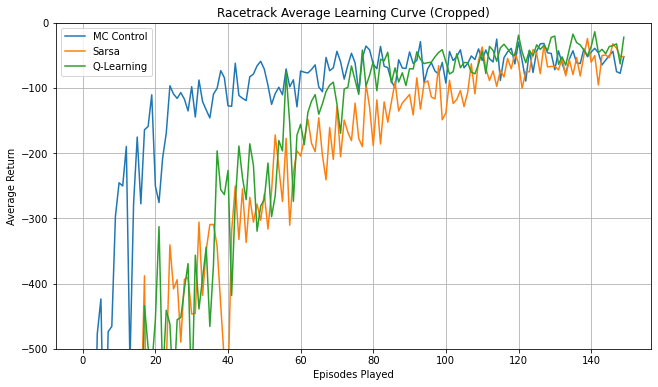

In [10]:
from racetrack_env import plot_combined_results

# Plotting Combined Learning Curve.
%matplotlib inline
plot_combined_results(mc_rewards, sarsa_rewards, q_learning_rewards)

Based on your results, and your understanding of the algorithms that you have implemented, please answer the following discussion questions. <br />
Please do not exceed **two sentences** for any of your answers.

**Question 1:** Briefly compare the performance of each of your agents.

**Question 2:** Why do you think that your Monte Carlo and Temporal-Difference agents behaved differently?

**Question 3:** Does the performance of your Sarsa and Q-Learning agents meet your expectations? Why do you think that this was the case?

**Question 4:** What could be done to improve the performance of your agents?

Please write your answers for Exercise 4 in this markdown cell.

**Answer 1:**
Monte Carlo agent starts with the lowest average rewards but its rewards increases and surpasses both Q-learning and Sarsa agents after roughly 5 episodes and maintains higher average rewards for another 50-60 episodes. All three agents converge around the same point however using the second graph, we can observe that the Q-learning converges at a higher average point (marginal difference).

**Answer 2:**
Monte Carlo agent starts with the lowest rewards out of the 3 because it doesn't learn anything during the first episode(random actions are chosen at each step due to an empty q-table) but Q-learnig and SARSA do learn in the first episode which lead to  them performing a lot better in the first episode.  on the other hand, the steep learning curve of the MC agent is the result of the algorithm not having a learning rate (it learns the whole episode but SARSA and Q-learning only step toward the goal alpha of a step information).  

**Answer 3:**
Initially, based on the example provided in the lecture, I was expecting my Sarsa to perform better however as seen in the graphs, it performs worse. I believe this is due to the low punishment (compare to the cliff-walking environment) given to a failure which encourrages a more agressive and riskier actions (optimal policy rather than sub-optimal safe policy) because even if agent fails due to the explotaring, it only receieves - 10 reward which is made up for by reaching the goal way quicker in the next episodes (SARSA will try to stay in the middle lanes and use less velocity where q-learning will use high velocity and reach the goal faster) 

**Answer 4:**
First thing that comes to mind is hyperparameter(learning rate, discount factor, number of episodes) adjustments so we are maximising the learning speed and learned inforamtion in this specific environment, however we can also improve the algorithims themselves (e.g., applying constant lambda MC instead of normal one, aplting dyna Q instead of vanilla Q-learning and SARSA(lambda) instead of the basic one)

## Exercise 5: Modified Q-Learning Agent (18 Marks)
### Exercise 5a: Implementation
In this exercise, you must implement a Temporal-Difference learning agent which learns to reach a goal state in the racetrack more efficiently than your previous Q-Learning agent. You may base your implementation on Q-Learning (Reinforcement Learning, Sutton & Barto, 2018, Section 6.5 p.131), the pseudocode for which is reproduced below, but you may also base your implementation on Sarsa if you wish.

<img src="images/q_learning_algo.png" style="width: 650px;"/>

In order to score high marks in this exercise, you will need to extend your solution beyond a simple Q-Learning or Sarsa agent to achieve higher performance and/or more efficient learning (i.e. using fewer interactions with the environment). Ideas for improving your agent will have been discussed in the unit, and can be found in the course textbook (Reinforcement Learning, Sutton & Barto, 2018). However you go about improving your agent, it must still use a **tabular** Temporal-Difference learning method at its core.

Please use the following parameter settings:
- Number of training episodes $= 150$.
- Number of agents averaged should be at **least** 2.

**If you use incorrect parameters, you may not get any credit for your work.**

You may adjust all other parameters as you see fit.


Your implementation of a tabular modified Temporal-Difference learning agent should produce a list named `modified_agent_rewards`. This list should contain one list for each agent that you train. Each sub-list should contain the undiscounted sum of rewards earned during each episode by the corresponding agent. <br />
For example, if you train $20$ agents, your `modified_agent_rewards` list will contain $20$ sub-lists, each containing $150$ integers. This list will be used to plot an average learning curve, which will be used to mark your work.


In [11]:
# Please write your code for Exercise 5a in this cell or in as many cells as you want ABOVE this cell.
# You should implement your modified q-learning agent agent and plot your average learning curve here.
# Do NOT delete this cell.
ACTION_LIST = [i for i in range(9)]
alpha = 0.2
gama = 0.9
epsilon = 0.15
num_episodes = 150
num_agents = 20
model_steps = 30
max_step = 200
modified_agent_rewards = np.zeros((num_agents, num_episodes))

def choose_action(state, q_values):
    action=0
    if np.random.random() < epsilon:
        action = np.random.randint(9)
    else:
        action = np.random.choice(np.where(q_values[state] == max(q_values[state]))[0])
    return action

for a in range(num_agents):
    epsilon = 0.25
    q_values = {}
    model = {}
    visited_states = []
    print("Training agent: " , a + 1)
    
    for e in range(num_episodes):
        
        cur_state = env.reset()
        
        if cur_state not in q_values:
            q_values[cur_state] = np.zeros(9)
        
       
        terminal = False
        while not terminal:
            if cur_state not in model:
                model[cur_state] = {}
                
            if cur_state not in visited_states:
                visited_states.append(cur_state)
                
            action = choose_action(cur_state, q_values)
            
            new_state, reward, terminal = env.step(action)
            

            model[cur_state][action] = (new_state, reward)
            
            modified_agent_rewards[a][e] += reward
            
            if new_state not in q_values:
                q_values[new_state] = np.zeros(9)
                
            oldQ = q_values[cur_state][action] 
            q_values[cur_state][action] = oldQ + alpha * (reward + gamma * max(q_values[new_state]) - oldQ)
            
            for m in range(model_steps):
                s = random.choice(visited_states)
                a = random.choice([*model[s]])
                (sp, r) = model[s][a]
                oldQ = q_values[s][a]
                q_values[s][a] = oldQ + alpha * (r  + gamma * max(q_values[sp]) - oldQ)
                
            cur_state = new_state
        epsilon = epsilon * 0.68
# YOUR CODE HERE

Training agent:  1
Training agent:  2
Training agent:  3
Training agent:  4
Training agent:  5
Training agent:  6
Training agent:  7
Training agent:  8
Training agent:  9
Training agent:  10
Training agent:  11
Training agent:  12
Training agent:  13
Training agent:  14
Training agent:  15
Training agent:  16
Training agent:  17
Training agent:  18
Training agent:  19
Training agent:  20


### Exercise 5b: Comparison & Discussion

Below, we have used your results to plot a the performance of your modified agent and your previous Q-Learning agent on the same set of axes. <br />
A cropped version of this learning curve has also been plotted, to make it easier to compare the performance of your agents towards the end of training.

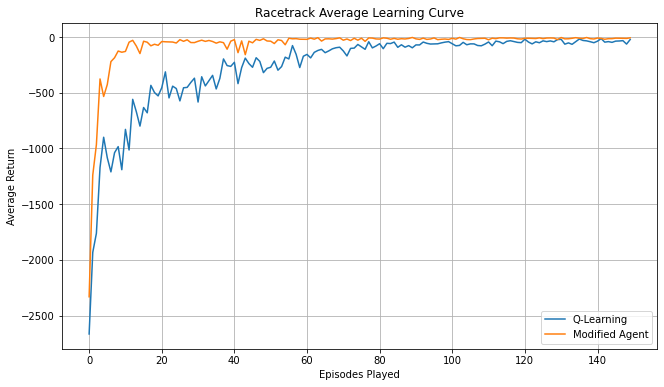

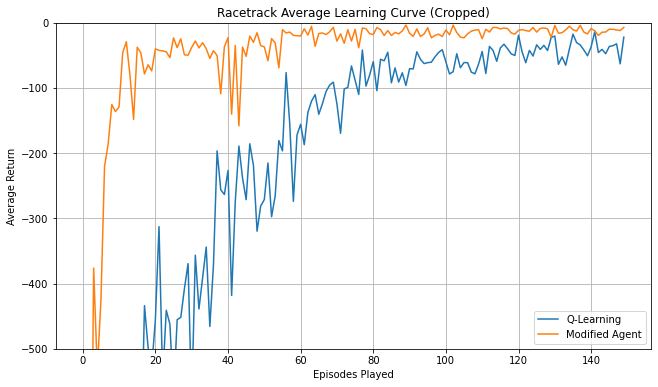

In [12]:
from racetrack_env import plot_modified_agent_results
from racetrack_env import simple_issue_checking

# Checking Modified Agent Results for Obvious Issues.
simple_issue_checking(modified_agent_rewards, modified_agent = True)

# Plotting Modified Agent Learning Curve.
%matplotlib inline
plot_modified_agent_results(q_learning_rewards, modified_agent_rewards)

Based on your results, and your understanding of the algorithm and modifications that you have implemented, please answer the following discussion questions. <br />
Please do not exceed **two sentences** for any of your answers.

**Question 1:** What modifications did you make to your agent?

**Question 2:** What effect(s) did you expect your modifications to have on the performance of your agent?

**Question 3:** Did your modifications have the effect(s) you expected? Why do you think that this was the case?

**Question 4:** If you had more time, what would you do to further improve the performance of your agent?

Please note that **your implementation and discussion will be assessed jointly**. This means that, in order to score highly, you will need to correctly implement appropriate modifications to your agent **AND** discuss them well.

Please write your answers for Exercise 5b in this markdown cell.

**Answer 1:**
I modiefied the Q-learning agent and turned it into a dyna Q agent which was done by adding a simulation section to the Q-learning code and saving a model of the environment ina dictionary using this simualtion (in this simulation step, a random state, action that has been done during the q-learning process is taken and used to update q value of the chosen state, action pair, this process is repeated 30 times so up to 30 values in q table can be updated rather than just one). I also adjust the epsilon value after each episode by multiplying epsilon_decay value to it after each episode which reduces the amount of exploration as the agents starts learning the optimal policy more. (I achieved the intial epsilon value and the epsilon decay rate by trying different numbers)

**Answer 2:**
I was expecting the new modified agent to have a steeper learning curve(much higher values in the first episodes) due to the implementation of dyna q (since the agent now updates multiple q values after each episode instead of only one). As a result of the epsilon decay implementation, a higher average rewards(also more smooth) was expected in the later episodes as the agent takes the optimal action more often.

**Answer 3:**
Yes they did have the effects I expected(Although finding the hyperarameters for epsilon required quite a bit of trial and error due to original uncertainty of action success but at the end I was very happy with the average rewards in later episodes). This is caused due to being able to update multiple q values and leaning more towards the optimal policy which the environment was okay with(

**Answer 4:**
This agent can be improved even more by fine-tuning epsilon even more along with other hyperparameters like discount factor value. We can also implement the stochasicity of the environment in the simulation step by keeping count of the ratio of succesful actions (and updating the model at each step with respect to this ration) which will converge to the true action fail rate of the environment with enough steps, and can also be combined with the addition of a dyna q+ implementation which requires keeping count of the last time current (state, action) pair was seen and consireing it in the q updating. (encourages agent to explore more by giving higher value for visiting (state, action) pairs that haven not explored for a while)